### (a)

#### i

\begin{align*}
J(\theta) = & \ \frac {1} {2} \Sigma^m_{i=1} w^{(i)} (\theta^T x^{(i)} - y^{(i)})^2 \\
= & \ \Sigma^m_{i=1} (\theta^T x^{(i)} - y^{(i)}) \frac {1} {2} w^{(i)} (\theta^T x^{(i)} - y^{(i)}) \\
= & \ (X\theta - y)^T W (X\theta - y)
\end{align*}

and,
\begin{align*}
W = \frac {1} {2} diag(w^{(1)}, \ldots, w^{(m)})
\end{align*}

#### ii

\begin{align*}
J(\theta) = & \ (X\theta - y)^T W (X\theta - y) \\
= & \ \theta^T X^T W X \theta - y^T W X \theta - \theta^T X^T W y + y^T W y \\
= & \ \theta^T X^T W X \theta - 2 y^T W X \theta + y^T W y \\
\nabla_\theta J(\theta) = & \nabla_\theta (\theta^T X^T W X \theta - 2 y^T W X \theta + y^T W y) \\
= & \ 2 \theta^T X^T W X - 2 y^T W X
\end{align*}

then, let $ \nabla_\theta J(\theta) = 0 $:
\begin{align*}
\nabla_\theta J(\theta) = & \ 0 \\
2 \theta^T X^T W X - 2 y^T W X = & \ 0 \\
\theta^T X^T W X = & \ y^T W X \\
\theta^T = & \ y^T W X (X^T W X)^{-1} \\
\theta = & \ (X^T W X)^{-1} X^T W y
\end{align*}

#### iii

for likelihood:
\begin{align*}
L(\theta) = \prod^m_{i=1} p(y^{(i)} \vert x^{(i)}; \theta)
\end{align*}

for log-likelihood:
\begin{align*}
\ell(\theta) = & \ \log \prod^m_{i=1} p(y^{(i)} \vert x^{(i)}; \theta) \\
= &\ \sum^m_{i=1} \log p(y^{(i)} \vert x^{(i)}; \theta) \\
= & \ \sum^m_{i=1} \log \frac {1} {\sqrt{2 \pi} \sigma^{(i)}} \exp \big( - \frac {(y^{(i)} - \theta^T x^{(i)})^2} {2(\sigma^{(i)})^2} \big) \\
= & \ \sum^m_{i=1} \big( - \frac {1} {2} \frac {1} {(\sigma^{(i)})^2} (y^{(i)} - \theta^T x^{(i)})^2 - \log \sqrt{2 \pi} \sigma^{(i)} \big) \\
= & \ - \frac {1} {2} \sum^m_{i=1} \frac {1} {(\sigma^{(i)})^2} (y^{(i)} - \theta^T x^{(i)})^2 - \sum^m_{i=1} \log \sqrt{2 \pi} \sigma^{(i)} \\
\end{align*}

so, if we want to maximum $ \ell(\theta) $, we should minimize
\begin{align*}
\frac {1} {2} \sum^m_{i=1} \frac {1} {(\sigma^{(i)})^2} (y^{(i)} - \theta^T x^{(i)})^2
\end{align*}

that is a weighted linear regression problem, and
\begin{align*}
w^{(i)} = \frac {1} {(\sigma^{(i)})^2}
\end{align*}

### (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
# code implements here
from src.p05b_lwr import LocallyWeightedLinearRegression

In [2]:
# define mean squared error
def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

In [3]:
def plot(x, y_label, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y_label, 'bx', label='label')
    plt.plot(x[:,-1], y_pred, 'ro', label='pred')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='best')

In [4]:
ds5_train_path = './data/ds5_train.csv'
ds5_valid_path = './data/ds5_valid.csv'
ds5_test_path = './data/ds5_test.csv'

In [5]:
ds5_x_train, ds5_y_train = util.load_dataset(
    ds5_train_path, add_intercept=True
)
ds5_x_valid, ds5_y_valid = util.load_dataset(
    ds5_valid_path, add_intercept=True
)
ds5_x_test, ds5_y_test = util.load_dataset(
    ds5_test_path, add_intercept=True
)

In [6]:
clf_b = LocallyWeightedLinearRegression(tau=0.5)
clf_b.fit(ds5_x_train, ds5_y_train)

In [7]:
ds5_y_valid_pred = clf_b.predict(ds5_x_valid)

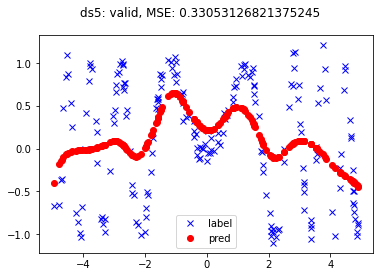

In [8]:
plot(ds5_x_valid, ds5_y_valid, ds5_y_valid_pred,
    'ds5: valid, MSE: {}'.format(mse(ds5_y_valid_pred, ds5_y_valid))
)

It seems underfitting.

### (c)

In [9]:
def search_tau(tau_values, x_train, y_train, 
               x_valid, y_valid, show_graph=False):
    best_tau = None
    best_mse = None
    
    for tau in tau_values:
        clf = LocallyWeightedLinearRegression(tau=tau)
        clf.fit(x_train, y_train)
        y_valid_pred = clf.predict(x_valid)
        valid_mse = mse(y_valid_pred, y_valid)
        
        if show_graph:
            plot(x_valid, y_valid, y_valid_pred,
                'ds5: valid, tau: {}, MSE: {}'.format(tau, valid_mse)
            )
        
        if best_tau is None or valid_mse < best_mse:
            best_tau = tau
            best_mse = valid_mse
    
    return best_tau

In [10]:
# also, we should choose good taus to avoid error
tau_values = [1, 0.5, 0.1, 0.05]

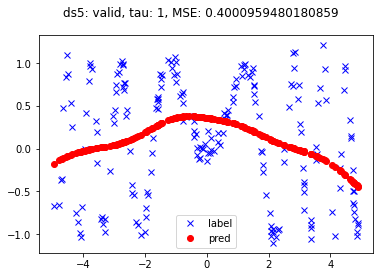

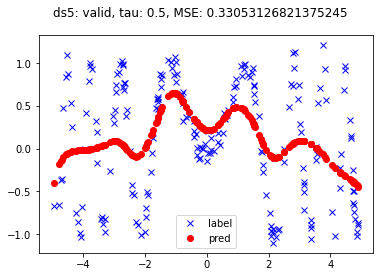

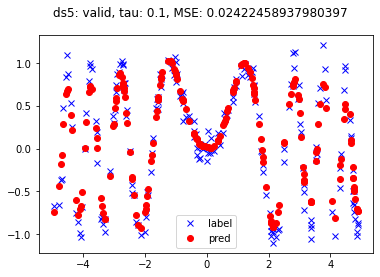

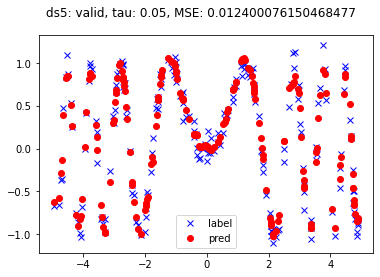

In [11]:
best_tau = search_tau(tau_values, ds5_x_train, ds5_y_train,
                      ds5_x_valid, ds5_y_valid, show_graph=True)

In [12]:
clf_c = LocallyWeightedLinearRegression(tau=best_tau)
clf_c.fit(ds5_x_train, ds5_y_train)

In [13]:
ds5_y_test_pred = clf_c.predict(ds5_x_test)

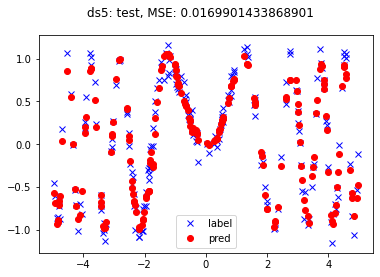

In [14]:
plot(ds5_x_test, ds5_y_test, ds5_y_test_pred,
    'ds5: test, MSE: {}'.format(mse(ds5_y_test_pred, ds5_y_test))
)